In [5]:
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

fatal: destination path 'yolov3-tf2' already exists and is not an empty directory.
/content/yolov3-tf2
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-manylinux2014_x86_64.whl (3.8 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found exi

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/yolov3-tf2/
!ls

import tensorflow as tf
tf.__version__

/content/yolov3-tf2
build		 data		  logs			tools
checkpoints	 detect.py	  models		train.py
colab_gpu.ipynb  detect_video.py  README.md		yolov3_tf2
conda-cpu.yml	 dist		  requirements-gpu.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  requirements.txt
convert.py	 LICENSE	  setup.py


'2.4.2'

##Convert Pretrained Darknet Weight

In [4]:
# %cd 


In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights -O /content/drive/MyDrive/UAV/Model/data/yolov3.weights

--2021-08-12 12:40:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’

/content/drive/MyDr 100%[===================>] 236.52M  51.2MB/s    in 4.7s    

2021-08-12 12:40:42 (50.6 MB/s) - ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’ saved [248007048/248007048]



In [9]:
# --tiny yolov3-tiny --num_classes 1
!python convert.py --weights /content/drive/MyDrive/UAV/Model/data/yolov3.weights --output /content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf

2021-08-12 12:40:46.218198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-08-12 12:40:47.847655: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-12 12:40:47.848880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-12 12:40:47.888992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 12:40:47.889652: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 12:40:47.889696: I tensorflow/stream_executor/platform/default/dso_loade

##Transfer Learning

In [10]:
pathDataset = "/content/drive/MyDrive/UAV/Model/train_image_folder"
output_path = "/content/drive/MyDrive/UAV/Model/data"
pathCSV = f"{output_path}/images_info.csv"

pathResizeImages = f"{output_path}/images_resize"
pathResizeCSV = f"{output_path}/images_info_resize.csv"


imageTest = "/content/drive/MyDrive/UAV/Model/train_image_folder/000.jpg"
annoYolo = "/content/drive/MyDrive/UAV/Model/yolo_anno"
annoVoc = "/content/drive/MyDrive/UAV/Model/voc_anno"

filenameTrain = f"{output_path}/train_labels.csv"
filenameTest = f"{output_path}/test_labels.csv"

In [11]:
%%bash
#!/bin/bash

touch /content/drive/MyDrive/UAV/Model/data/uav.names

__usage="person"


echo "$__usage" > /content/drive/MyDrive/UAV/Model/data/uav.names
cd data
cat /content/drive/MyDrive/UAV/Model/data/uav.names

person


In [12]:
!mkdir /content/drive/MyDrive/UAV/Model/checkpoints
# file already exists

mkdir: cannot create directory ‘/content/drive/MyDrive/UAV/Model/checkpoints’: File exists


In [13]:
%cd /content/yolov3-tf2

/content/yolov3-tf2


!python /content/drive/MyDrive/UAV/Model/create_tfrecord.py 

--csv_input=/content/drive/MyDrive/UAV/Model/data/train_labels.csv  

--output_path=/content/drive/MyDrive/UAV/Model/data/train.record

--image_dir=/content/drive/MyDrive/UAV/Model/data/images_resize

In [14]:
!python train.py \
--dataset /content/drive/MyDrive/UAV/Model/data/train.record \
	--val_dataset /content/drive/MyDrive/UAV/Model/data/test.record \
	--classes /content/drive/MyDrive/UAV/Model/data/uav.names \
	--num_classes 1 \
	--mode fit --transfer darknet \
	--batch_size 8 \
	--epochs 100 \
	--weights /content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf \
	--weights_num_classes 80 \
  --size 320


2021-08-12 12:42:07.547960: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-08-12 12:42:09.168093: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-12 12:42:09.168976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-12 12:42:09.199571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 12:42:09.200153: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 12:42:09.200193: I tensorflow/stream_executor/platform/default/dso_loade

In [15]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [29]:
def hyperparameter(iou, score):
  # Lower threshold due to insufficient training
  FLAGS.yolo_iou_threshold = iou
  FLAGS.yolo_score_threshold = score

def load():
  if FLAGS.tiny:
      yolo = YoloV3Tiny(classes=FLAGS.num_classes)
  else:
      yolo = YoloV3(classes=FLAGS.num_classes)

  if FLAGS.weights:
    try:
      yolo.load_weights(FLAGS.weights).expect_partial()
      logging.info('weights loaded')
    except ValueError:
      pass

  #logging.info('weights loaded')

  class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
  #logging.info('classes loaded')

  img_raw = tf.image.decode_image(
      open(FLAGS.image, 'rb').read(), channels=3)

  img = tf.expand_dims(img_raw, 0)
  img = transform_images(img, FLAGS.size)

  t1 = time.time()
  boxes, scores, classes, nums = yolo(img)
  t2 = time.time()
  logging.info('time: {}'.format(t2 - t1))

  #logging.info('detections:')
  #for i in range(nums[0]):
  #    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])], np.array(scores[0][i]), np.array(boxes[0][i])))

  img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
  img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

  from IPython.display import Image, display
  display(Image(data=bytes(cv2.imencode('.jpg', img)[1])))

### Images

I0812 13:13:20.321910 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 0


W0812 13:13:22.152931 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97


W0812 13:13:22.157063 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-173


W0812 13:13:22.163219 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-98


W0812 13:13:22.167847 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99


W0812 13:13:22.172378 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-176


W0812 13:13:22.176921 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-177


W0812 13:13:22.181402 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-100


W0812 13:13:22.185876 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101


W0812 13:13:22.190448 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-180


W0812 13:13:22.193966 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-102


W0812 13:13:22.198043 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103


W0812 13:13:22.202264 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-183


W0812 13:13:22.205570 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer-184


W0812 13:13:22.209566 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-0


W0812 13:13:22.211669 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-0


W0812 13:13:22.213459 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1


W0812 13:13:22.215858 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-3


W0812 13:13:22.219308 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-2


W0812 13:13:22.225686 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3


W0812 13:13:22.227291 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-6


W0812 13:13:22.229515 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-4


W0812 13:13:22.232368 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5


W0812 13:13:22.234752 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-9


W0812 13:13:22.237605 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-6


W0812 13:13:22.240090 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7


W0812 13:13:22.242876 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-12


W0812 13:13:22.247602 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-8


W0812 13:13:22.249991 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9


W0812 13:13:22.253506 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer-15


W0812 13:13:22.256038 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-0


W0812 13:13:22.258496 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-0


W0812 13:13:22.261050 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1


W0812 13:13:22.263838 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-3


W0812 13:13:22.266287 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-4


W0812 13:13:22.268677 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-5


W0812 13:13:22.271099 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-6


W0812 13:13:22.273586 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-2


W0812 13:13:22.276040 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3


W0812 13:13:22.278627 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-9


W0812 13:13:22.280999 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-4


W0812 13:13:22.283494 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5


W0812 13:13:22.285741 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-12


W0812 13:13:22.288347 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-6


W0812 13:13:22.290874 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7


W0812 13:13:22.293306 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-15


W0812 13:13:22.295668 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-8


W0812 13:13:22.298124 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9


W0812 13:13:22.300549 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-18


W0812 13:13:22.303049 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-10


W0812 13:13:22.305477 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11


W0812 13:13:22.307955 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer-21


W0812 13:13:22.310404 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-0


W0812 13:13:22.312856 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-0


W0812 13:13:22.315238 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1


W0812 13:13:22.317724 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-3


W0812 13:13:22.320112 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-4


W0812 13:13:22.322649 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-5


W0812 13:13:22.325179 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-6


W0812 13:13:22.327780 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-2


W0812 13:13:22.330253 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3


W0812 13:13:22.332719 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-9


W0812 13:13:22.334995 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-4


W0812 13:13:22.337339 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5


W0812 13:13:22.339524 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-12


W0812 13:13:22.341849 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-6


W0812 13:13:22.344249 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7


W0812 13:13:22.346580 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-15


W0812 13:13:22.349104 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-8


W0812 13:13:22.351920 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9


W0812 13:13:22.354366 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-18


W0812 13:13:22.356733 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-10


W0812 13:13:22.358685 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11


W0812 13:13:22.360461 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer-21


W0812 13:13:22.361993 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer-0


W0812 13:13:22.363548 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-0


W0812 13:13:22.365095 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1


W0812 13:13:22.367558 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer-3


W0812 13:13:22.372003 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-2


W0812 13:13:22.375060 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer-5


W0812 13:13:22.377683 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer-0


W0812 13:13:22.381515 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-0


W0812 13:13:22.383932 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1


W0812 13:13:22.386402 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer-3


W0812 13:13:22.388929 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-2


W0812 13:13:22.391222 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer-5


W0812 13:13:22.394394 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer-0


W0812 13:13:22.396874 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-0


W0812 13:13:22.399651 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1


W0812 13:13:22.402151 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer-3


W0812 13:13:22.404698 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-2


W0812 13:13:22.409252 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer-5


W0812 13:13:22.412357 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-0.kernel


W0812 13:13:22.415005 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-1.axis


W0812 13:13:22.418708 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-1.gamma


W0812 13:13:22.424455 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-1.beta


W0812 13:13:22.427026 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-1.moving_mean


W0812 13:13:22.429644 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-1.moving_variance


W0812 13:13:22.433356 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-2.kernel


W0812 13:13:22.437001 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-3.axis


W0812 13:13:22.439929 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-3.gamma


W0812 13:13:22.442527 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-3.beta


W0812 13:13:22.446908 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-3.moving_mean


W0812 13:13:22.449856 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-3.moving_variance


W0812 13:13:22.452469 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-4.kernel


W0812 13:13:22.454883 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-5.axis


W0812 13:13:22.458464 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-5.gamma


W0812 13:13:22.461793 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-5.beta


W0812 13:13:22.464411 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-5.moving_mean


W0812 13:13:22.466917 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-5.moving_variance


W0812 13:13:22.471850 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-6.kernel


W0812 13:13:22.474661 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-7.axis


W0812 13:13:22.477289 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-7.gamma


W0812 13:13:22.488497 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-7.beta


W0812 13:13:22.492369 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-7.moving_mean


W0812 13:13:22.495800 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-7.moving_variance


W0812 13:13:22.498234 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-8.kernel


W0812 13:13:22.502571 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-9.axis


W0812 13:13:22.506925 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-9.gamma


W0812 13:13:22.509540 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-9.beta


W0812 13:13:22.513121 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-9.moving_mean


W0812 13:13:22.516644 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-9.moving_variance


W0812 13:13:22.520881 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-10.kernel


W0812 13:13:22.525422 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-11.axis


W0812 13:13:22.527889 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-11.gamma


W0812 13:13:22.531249 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-11.beta


W0812 13:13:22.535636 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-11.moving_mean


W0812 13:13:22.538222 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-11.moving_variance


W0812 13:13:22.545295 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-12.kernel


W0812 13:13:22.549937 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-13.axis


W0812 13:13:22.552427 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-13.gamma


W0812 13:13:22.554790 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-13.beta


W0812 13:13:22.557086 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-13.moving_mean


W0812 13:13:22.560837 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-13.moving_variance


W0812 13:13:22.564971 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-14.kernel


W0812 13:13:22.568989 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-15.axis


W0812 13:13:22.571355 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-15.gamma


W0812 13:13:22.574405 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-15.beta


W0812 13:13:22.578477 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-15.moving_mean


W0812 13:13:22.582526 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-15.moving_variance


W0812 13:13:22.585218 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-16.kernel


W0812 13:13:22.589062 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-17.axis


W0812 13:13:22.591868 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-17.gamma


W0812 13:13:22.595748 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-17.beta


W0812 13:13:22.598515 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-17.moving_mean


W0812 13:13:22.602423 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-17.moving_variance


W0812 13:13:22.605229 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-18.kernel


W0812 13:13:22.607754 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-19.axis


W0812 13:13:22.610362 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-19.gamma


W0812 13:13:22.621258 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-19.beta


W0812 13:13:22.626543 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-19.moving_mean


W0812 13:13:22.634685 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-19.moving_variance


W0812 13:13:22.640965 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-20.kernel


W0812 13:13:22.647207 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-21.axis


W0812 13:13:22.651538 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-21.gamma


W0812 13:13:22.654061 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-21.beta


W0812 13:13:22.656335 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-21.moving_mean


W0812 13:13:22.661247 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-21.moving_variance


W0812 13:13:22.665254 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-22.kernel


W0812 13:13:22.668416 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-23.axis


W0812 13:13:22.670503 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-23.gamma


W0812 13:13:22.673015 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-23.beta


W0812 13:13:22.677994 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-23.moving_mean


W0812 13:13:22.680308 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-23.moving_variance


W0812 13:13:22.682591 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-24.kernel


W0812 13:13:22.684818 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-25.axis


W0812 13:13:22.688420 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-25.gamma


W0812 13:13:22.693533 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-25.beta


W0812 13:13:22.696010 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-25.moving_mean


W0812 13:13:22.698285 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-25.moving_variance


W0812 13:13:22.700847 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-26.kernel


W0812 13:13:22.704358 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-27.axis


W0812 13:13:22.707937 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-27.gamma


W0812 13:13:22.710264 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-27.beta


W0812 13:13:22.712670 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-27.moving_mean


W0812 13:13:22.715173 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-27.moving_variance


W0812 13:13:22.717498 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-28.kernel


W0812 13:13:22.721183 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-29.axis


W0812 13:13:22.723518 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-29.gamma


W0812 13:13:22.726002 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-29.beta


W0812 13:13:22.728480 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-29.moving_mean


W0812 13:13:22.730587 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-29.moving_variance


W0812 13:13:22.734223 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-30.kernel


W0812 13:13:22.742903 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-31.axis


W0812 13:13:22.744837 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-31.gamma


W0812 13:13:22.746726 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-31.beta


W0812 13:13:22.749349 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-31.moving_mean


W0812 13:13:22.753012 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-31.moving_variance


W0812 13:13:22.755280 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-32.kernel


W0812 13:13:22.757682 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-33.axis


W0812 13:13:22.760281 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-33.gamma


W0812 13:13:22.762769 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-33.beta


W0812 13:13:22.765137 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-33.moving_mean


W0812 13:13:22.767585 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-33.moving_variance


W0812 13:13:22.771478 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-34.kernel


W0812 13:13:22.773656 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-35.axis


W0812 13:13:22.775973 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-35.gamma


W0812 13:13:22.778188 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-35.beta


W0812 13:13:22.780363 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-35.moving_mean


W0812 13:13:22.782807 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-35.moving_variance


W0812 13:13:22.784883 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-36.kernel


W0812 13:13:22.788762 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-37.axis


W0812 13:13:22.798159 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-37.gamma


W0812 13:13:22.800531 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-37.beta


W0812 13:13:22.803010 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-37.moving_mean


W0812 13:13:22.806423 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-37.moving_variance


W0812 13:13:22.808672 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-38.kernel


W0812 13:13:23.025981 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-39.axis


W0812 13:13:23.030344 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-39.gamma


W0812 13:13:23.034572 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-39.beta


W0812 13:13:23.040606 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-39.moving_mean


W0812 13:13:23.045224 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-39.moving_variance


W0812 13:13:23.051733 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-40.kernel


W0812 13:13:23.055725 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-41.axis


W0812 13:13:23.062060 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-41.gamma


W0812 13:13:23.068352 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-41.beta


W0812 13:13:23.073720 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-41.moving_mean


W0812 13:13:23.079103 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-41.moving_variance


W0812 13:13:23.092091 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-42.kernel


W0812 13:13:23.096818 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-43.axis


W0812 13:13:23.101202 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-43.gamma


W0812 13:13:23.105577 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-43.beta


W0812 13:13:23.113336 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-43.moving_mean


W0812 13:13:23.118624 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-43.moving_variance


W0812 13:13:23.124662 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-44.kernel


W0812 13:13:23.128612 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-45.axis


W0812 13:13:23.135128 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-45.gamma


W0812 13:13:23.139155 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-45.beta


W0812 13:13:23.142854 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-45.moving_mean


W0812 13:13:23.146595 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-45.moving_variance


W0812 13:13:23.151225 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-46.kernel


W0812 13:13:23.160789 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-47.axis


W0812 13:13:23.164227 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-47.gamma


W0812 13:13:23.168227 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-47.beta


W0812 13:13:23.176103 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-47.moving_mean


W0812 13:13:23.181472 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-47.moving_variance


W0812 13:13:23.184863 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-48.kernel


W0812 13:13:23.216435 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-49.axis


W0812 13:13:23.222198 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-49.gamma


W0812 13:13:23.227190 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-49.beta


W0812 13:13:23.234627 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-49.moving_mean


W0812 13:13:23.237579 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-49.moving_variance


W0812 13:13:23.239457 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-50.kernel


W0812 13:13:23.241375 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-51.axis


W0812 13:13:23.244636 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-51.gamma


W0812 13:13:23.248608 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-51.beta


W0812 13:13:23.251383 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-51.moving_mean


W0812 13:13:23.253657 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-51.moving_variance


W0812 13:13:23.255463 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-52.kernel


W0812 13:13:23.257909 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-53.axis


W0812 13:13:23.260371 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-53.gamma


W0812 13:13:23.263557 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-53.beta


W0812 13:13:23.266460 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-53.moving_mean


W0812 13:13:23.268368 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-53.moving_variance


W0812 13:13:23.270213 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-54.kernel


W0812 13:13:23.272922 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-55.axis


W0812 13:13:23.275565 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-55.gamma


W0812 13:13:23.278243 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-55.beta


W0812 13:13:23.283260 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-55.moving_mean


W0812 13:13:23.287576 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-55.moving_variance


W0812 13:13:23.292216 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-56.kernel


W0812 13:13:23.297866 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-57.axis


W0812 13:13:23.302358 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-57.gamma


W0812 13:13:23.307938 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-57.beta


W0812 13:13:23.312266 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-57.moving_mean


W0812 13:13:23.317269 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-57.moving_variance


W0812 13:13:23.322894 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-58.kernel


W0812 13:13:23.328924 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-59.axis


W0812 13:13:23.333051 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-59.gamma


W0812 13:13:23.336974 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-59.beta


W0812 13:13:23.341355 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-59.moving_mean


W0812 13:13:23.348489 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-59.moving_variance


W0812 13:13:23.353227 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-60.kernel


W0812 13:13:23.357238 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-61.axis


W0812 13:13:23.361271 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-61.gamma


W0812 13:13:23.366552 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-61.beta


W0812 13:13:23.370282 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-61.moving_mean


W0812 13:13:23.374774 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-61.moving_variance


W0812 13:13:23.379374 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-62.kernel


W0812 13:13:23.385753 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-63.axis


W0812 13:13:23.390161 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-63.gamma


W0812 13:13:23.399377 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-63.beta


W0812 13:13:23.406763 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-63.moving_mean


W0812 13:13:23.417090 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-63.moving_variance


W0812 13:13:23.425036 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-64.kernel


W0812 13:13:23.441163 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-65.axis


W0812 13:13:23.455969 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-65.gamma


W0812 13:13:23.461300 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-65.beta


W0812 13:13:23.465733 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-65.moving_mean


W0812 13:13:23.471534 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-65.moving_variance


W0812 13:13:23.479751 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-66.kernel


W0812 13:13:23.489682 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-67.axis


W0812 13:13:23.494906 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-67.gamma


W0812 13:13:23.499950 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-67.beta


W0812 13:13:23.515223 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-67.moving_mean


W0812 13:13:23.517627 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-67.moving_variance


W0812 13:13:23.533190 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-68.kernel


W0812 13:13:23.545280 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-69.axis


W0812 13:13:23.553448 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-69.gamma


W0812 13:13:23.563701 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-69.beta


W0812 13:13:23.569016 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-69.moving_mean


W0812 13:13:23.578123 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-69.moving_variance


W0812 13:13:23.584116 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-70.kernel


W0812 13:13:23.596739 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-71.axis


W0812 13:13:23.607540 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-71.gamma


W0812 13:13:23.613602 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-71.beta


W0812 13:13:23.619002 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-71.moving_mean


W0812 13:13:23.630025 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-71.moving_variance


W0812 13:13:23.636053 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-72.kernel


W0812 13:13:23.640630 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-73.axis


W0812 13:13:23.644644 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-73.gamma


W0812 13:13:23.647725 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-73.beta


W0812 13:13:23.651326 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-73.moving_mean


W0812 13:13:23.659397 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-73.moving_variance


W0812 13:13:23.662452 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-74.kernel


W0812 13:13:23.664849 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-75.axis


W0812 13:13:23.667038 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-75.gamma


W0812 13:13:23.669711 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-75.beta


W0812 13:13:23.671572 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-75.moving_mean


W0812 13:13:23.674302 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-75.moving_variance


W0812 13:13:23.676092 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-76.kernel


W0812 13:13:23.677753 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-77.axis


W0812 13:13:23.679316 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-77.gamma


W0812 13:13:23.681319 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-77.beta


W0812 13:13:23.683203 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-77.moving_mean


W0812 13:13:23.684934 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-77.moving_variance


W0812 13:13:23.687623 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-78.kernel


W0812 13:13:23.689682 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-79.axis


W0812 13:13:23.691900 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-79.gamma


W0812 13:13:23.698931 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-79.beta


W0812 13:13:23.703481 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-79.moving_mean


W0812 13:13:23.706480 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-79.moving_variance


W0812 13:13:23.874093 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-80.kernel


W0812 13:13:23.885396 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-81.axis


W0812 13:13:23.890911 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-81.gamma


W0812 13:13:23.894375 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-81.beta


W0812 13:13:23.896902 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-81.moving_mean


W0812 13:13:23.898783 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-81.moving_variance


W0812 13:13:23.901063 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-82.kernel


W0812 13:13:23.909804 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-83.axis


W0812 13:13:23.917659 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-83.gamma


W0812 13:13:23.920800 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-83.beta


W0812 13:13:23.923118 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-83.moving_mean


W0812 13:13:23.924879 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-83.moving_variance


W0812 13:13:23.926432 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-84.kernel


W0812 13:13:23.928434 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-85.axis


W0812 13:13:23.930104 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-85.gamma


W0812 13:13:23.932044 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-85.beta


W0812 13:13:23.934318 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-85.moving_mean


W0812 13:13:23.936752 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-85.moving_variance


W0812 13:13:23.938576 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-86.kernel


W0812 13:13:23.943701 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-87.axis


W0812 13:13:23.949326 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-87.gamma


W0812 13:13:23.951891 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-87.beta


W0812 13:13:23.956102 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-87.moving_mean


W0812 13:13:23.960800 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-87.moving_variance


W0812 13:13:23.965773 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-88.kernel


W0812 13:13:23.970296 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-89.axis


W0812 13:13:23.976836 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-89.gamma


W0812 13:13:23.980206 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-89.beta


W0812 13:13:23.986864 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-89.moving_mean


W0812 13:13:23.992485 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-89.moving_variance


W0812 13:13:23.996987 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-90.kernel


W0812 13:13:24.001563 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-91.axis


W0812 13:13:24.006275 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-91.gamma


W0812 13:13:24.009032 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-91.beta


W0812 13:13:24.010813 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-91.moving_mean


W0812 13:13:24.012894 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-91.moving_variance


W0812 13:13:24.015149 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-92.kernel


W0812 13:13:24.017975 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-93.axis


W0812 13:13:24.019753 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-93.gamma


W0812 13:13:24.021594 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-93.beta


W0812 13:13:24.024687 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-93.moving_mean


W0812 13:13:24.027523 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-93.moving_variance


W0812 13:13:24.029513 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-94.kernel


W0812 13:13:24.031660 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-95.axis


W0812 13:13:24.033317 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-95.gamma


W0812 13:13:24.035083 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-95.beta


W0812 13:13:24.036982 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-95.moving_mean


W0812 13:13:24.042166 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-95.moving_variance


W0812 13:13:24.044642 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-96.kernel


W0812 13:13:24.046500 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97.axis


W0812 13:13:24.061021 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97.gamma


W0812 13:13:24.063396 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97.beta


W0812 13:13:24.065676 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97.moving_mean


W0812 13:13:24.068630 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-97.moving_variance


W0812 13:13:24.070464 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-98.kernel


W0812 13:13:24.073580 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99.axis


W0812 13:13:24.075752 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99.gamma


W0812 13:13:24.078709 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99.beta


W0812 13:13:24.082656 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99.moving_mean


W0812 13:13:24.086053 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-99.moving_variance


W0812 13:13:24.087925 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-100.kernel


W0812 13:13:24.090948 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101.axis


W0812 13:13:24.093368 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101.gamma


W0812 13:13:24.096033 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101.beta


W0812 13:13:24.098368 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101.moving_mean


W0812 13:13:24.101095 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-101.moving_variance


W0812 13:13:24.103392 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-102.kernel


W0812 13:13:24.110870 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103.axis


W0812 13:13:24.115705 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103.gamma


W0812 13:13:24.124521 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103.beta


W0812 13:13:24.131704 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103.moving_mean


W0812 13:13:24.136932 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-0.layer_with_weights-103.moving_variance


W0812 13:13:24.143097 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-0.kernel


W0812 13:13:24.147783 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1.axis


W0812 13:13:24.152380 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1.gamma


W0812 13:13:24.158885 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1.beta


W0812 13:13:24.163624 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1.moving_mean


W0812 13:13:24.168015 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-1.moving_variance


W0812 13:13:24.170521 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-2.kernel


W0812 13:13:24.172367 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3.axis


W0812 13:13:24.174170 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3.gamma


W0812 13:13:24.176948 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3.beta


W0812 13:13:24.179179 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3.moving_mean


W0812 13:13:24.181023 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-3.moving_variance


W0812 13:13:24.183593 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-4.kernel


W0812 13:13:24.186148 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5.axis


W0812 13:13:24.188354 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5.gamma


W0812 13:13:24.190334 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5.beta


W0812 13:13:24.192708 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5.moving_mean


W0812 13:13:24.194959 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-5.moving_variance


W0812 13:13:24.196827 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-6.kernel


W0812 13:13:24.198515 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7.axis


W0812 13:13:24.200318 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7.gamma


W0812 13:13:24.202118 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7.beta


W0812 13:13:24.203870 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7.moving_mean


W0812 13:13:24.205642 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-7.moving_variance


W0812 13:13:24.209807 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-8.kernel


W0812 13:13:24.211643 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9.axis


W0812 13:13:24.219095 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9.gamma


W0812 13:13:24.233720 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9.beta


W0812 13:13:24.239411 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9.moving_mean


W0812 13:13:24.245885 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-1.layer_with_weights-9.moving_variance


W0812 13:13:24.252125 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-0.kernel


W0812 13:13:24.268877 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1.axis


W0812 13:13:24.272265 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1.gamma


W0812 13:13:24.279505 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1.beta


W0812 13:13:24.286606 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1.moving_mean


W0812 13:13:24.292849 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-1.moving_variance


W0812 13:13:24.300589 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-2.kernel


W0812 13:13:24.309875 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3.axis


W0812 13:13:24.318024 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3.gamma


W0812 13:13:24.326380 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3.beta


W0812 13:13:24.332116 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3.moving_mean


W0812 13:13:24.334864 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-3.moving_variance


W0812 13:13:24.337304 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-4.kernel


W0812 13:13:24.345088 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5.axis


W0812 13:13:24.351246 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5.gamma


W0812 13:13:24.354668 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5.beta


W0812 13:13:24.366060 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5.moving_mean


W0812 13:13:24.370179 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-5.moving_variance


W0812 13:13:24.377912 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-6.kernel


W0812 13:13:24.380077 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7.axis


W0812 13:13:24.385927 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7.gamma


W0812 13:13:24.391762 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7.beta


W0812 13:13:24.395446 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7.moving_mean


W0812 13:13:24.607432 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-7.moving_variance


W0812 13:13:24.609618 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-8.kernel


W0812 13:13:24.611634 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9.axis


W0812 13:13:24.613845 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9.gamma


W0812 13:13:24.615802 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9.beta


W0812 13:13:24.617723 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9.moving_mean


W0812 13:13:24.619877 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-9.moving_variance


W0812 13:13:24.621993 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-10.kernel


W0812 13:13:24.624063 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11.axis


W0812 13:13:24.625945 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11.gamma


W0812 13:13:24.627882 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11.beta


W0812 13:13:24.629979 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11.moving_mean


W0812 13:13:24.632035 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-2.layer_with_weights-11.moving_variance


W0812 13:13:24.634038 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-0.kernel


W0812 13:13:24.636131 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1.axis


W0812 13:13:24.638129 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1.gamma


W0812 13:13:24.640066 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1.beta


W0812 13:13:24.642227 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1.moving_mean


W0812 13:13:24.644229 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-1.moving_variance


W0812 13:13:24.646152 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-2.kernel


W0812 13:13:24.648044 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3.axis


W0812 13:13:24.650089 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3.gamma


W0812 13:13:24.652507 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3.beta


W0812 13:13:24.654630 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3.moving_mean


W0812 13:13:24.656471 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-3.moving_variance


W0812 13:13:24.658176 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-4.kernel


W0812 13:13:24.660042 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5.axis


W0812 13:13:24.662053 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5.gamma


W0812 13:13:24.664037 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5.beta


W0812 13:13:24.695370 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5.moving_mean


W0812 13:13:24.709454 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-5.moving_variance


W0812 13:13:24.742465 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-6.kernel


W0812 13:13:24.759587 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7.axis


W0812 13:13:24.771946 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7.gamma


W0812 13:13:24.774503 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7.beta


W0812 13:13:24.777587 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7.moving_mean


W0812 13:13:24.780022 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-7.moving_variance


W0812 13:13:24.782755 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-8.kernel


W0812 13:13:24.787502 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9.axis


W0812 13:13:24.790316 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9.gamma


W0812 13:13:24.793067 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9.beta


W0812 13:13:24.795247 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9.moving_mean


W0812 13:13:24.797638 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-9.moving_variance


W0812 13:13:24.800014 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-10.kernel


W0812 13:13:24.802397 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11.axis


W0812 13:13:24.804557 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11.gamma


W0812 13:13:24.807314 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11.beta


W0812 13:13:24.811780 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11.moving_mean


W0812 13:13:24.814540 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-3.layer_with_weights-11.moving_variance


W0812 13:13:24.817128 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-0.kernel


W0812 13:13:24.819617 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1.axis


W0812 13:13:24.822152 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1.gamma


W0812 13:13:24.824857 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1.beta


W0812 13:13:24.827402 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1.moving_mean


W0812 13:13:24.829928 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-1.moving_variance


W0812 13:13:24.838696 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-2.kernel


W0812 13:13:24.845412 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-4.layer_with_weights-2.bias


W0812 13:13:24.849719 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-0.kernel


W0812 13:13:24.856148 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1.axis


W0812 13:13:24.864038 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1.gamma


W0812 13:13:24.871407 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1.beta


W0812 13:13:24.879841 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1.moving_mean


W0812 13:13:24.884002 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-1.moving_variance


W0812 13:13:24.890318 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-2.kernel


W0812 13:13:24.902770 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-5.layer_with_weights-2.bias


W0812 13:13:24.905730 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-0.kernel


W0812 13:13:24.938098 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1.axis


W0812 13:13:24.954867 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1.gamma


W0812 13:13:24.986046 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1.beta


W0812 13:13:24.989182 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1.moving_mean


W0812 13:13:25.013285 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-1.moving_variance


W0812 13:13:25.033493 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-2.kernel


W0812 13:13:25.052675 139745662187392 util.py:161] Unresolved object in checkpoint: (root).layer_with_weights-6.layer_with_weights-2.bias


W0812 13:13:25.076854 139745662187392 util.py:169] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/guide/checkpoint#loading_mechanics for details.
I0812 13:13:27.743503 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.13472795486450195


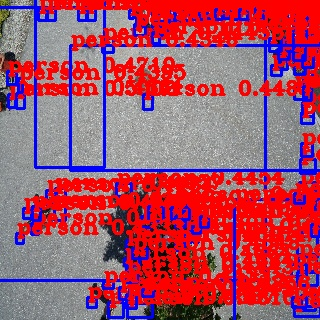

I0812 13:13:27.965183 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 1
I0812 13:13:31.205457 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09747099876403809


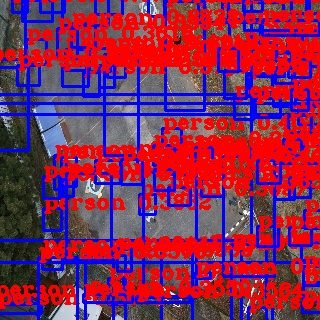

I0812 13:13:31.376327 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 2
I0812 13:13:34.515512 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10550785064697266


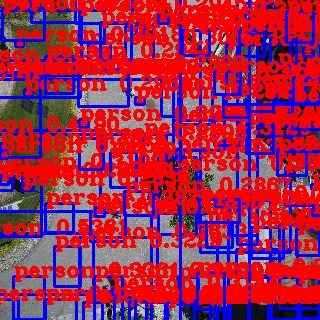

I0812 13:13:34.690490 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 3
I0812 13:13:38.203399 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.11562991142272949


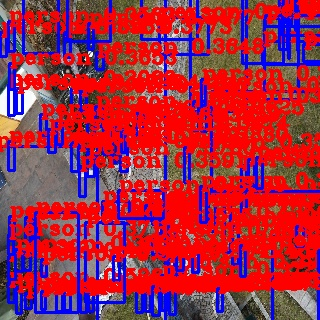

I0812 13:13:38.384319 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 4
I0812 13:13:41.818512 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10183048248291016


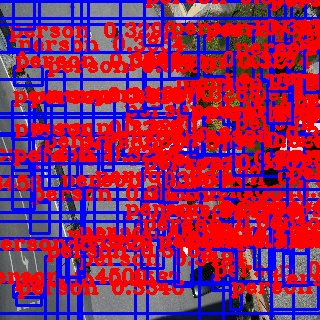

I0812 13:13:41.996161 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 5
I0812 13:13:45.250432 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10756897926330566


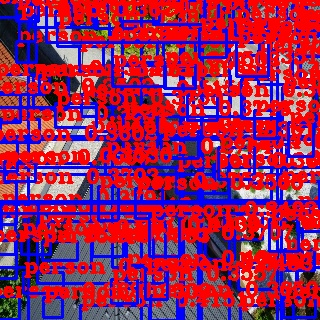

I0812 13:13:45.428450 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 6
I0812 13:13:48.895046 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10417866706848145


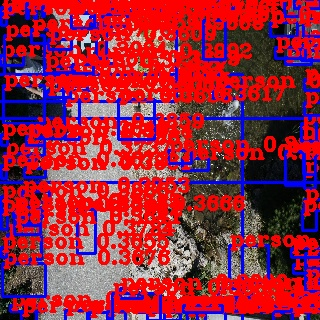

I0812 13:13:49.070666 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 7
I0812 13:13:52.770318 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10146570205688477


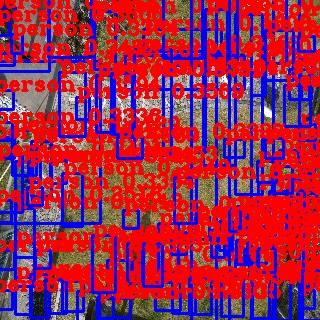

I0812 13:13:52.945058 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 8
I0812 13:13:56.646473 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10375380516052246


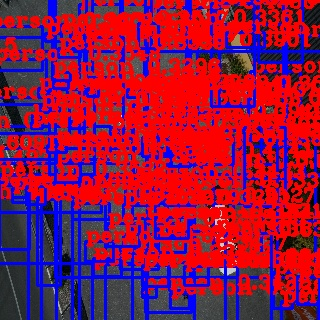

I0812 13:13:56.816346 139745662187392 <ipython-input-32-5e424ff9932d>:14] # 9
I0812 13:14:00.654796 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09437704086303711


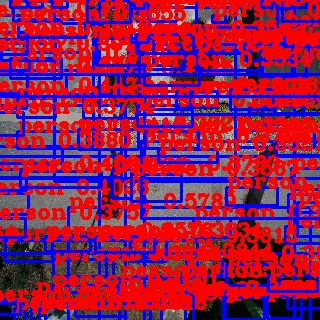

In [32]:
import glob

FLAGS.classes = '/content/drive/MyDrive/UAV/Model/data/uav.names'
FLAGS.weights = '/content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf'
FLAGS.num_classes = 1
FLAGS.size = 320

hyperparameter(0.2,0.2)
imagePath='/content/drive/MyDrive/UAV/Model/data/images_resize/'
imgList = glob.glob(imagePath + '/*')
images = [file for file in imgList if file.endswith(".jpg") or file.endswith(".JPG")]

for i in range(10):
  logging.info('# {}'.format(i))
  FLAGS.image=images[i]
  load()


### Hyperparameters test

I0812 13:20:09.698119 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.2, score threshold: 0.2
I0812 13:20:12.930332 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09732365608215332


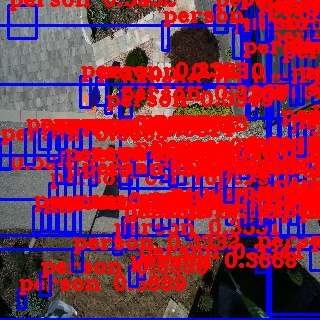

I0812 13:20:13.095312 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.3, score threshold: 0.3
I0812 13:20:16.159854 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.1037743091583252


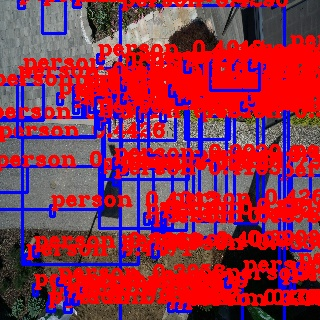

I0812 13:20:16.336216 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.4, score threshold: 0.4
I0812 13:20:19.529329 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09531712532043457


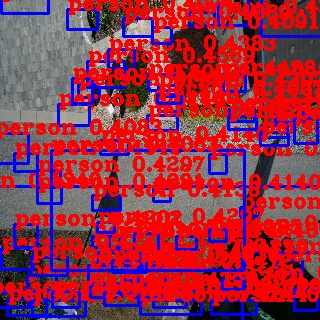

I0812 13:20:19.632225 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.5, score threshold: 0.5
I0812 13:20:22.672370 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09387969970703125


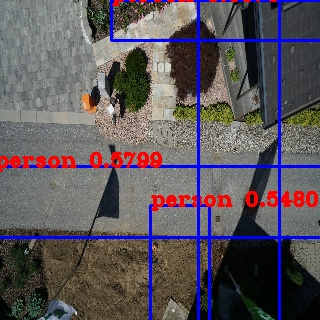

I0812 13:20:22.691414 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.6, score threshold: 0.6
I0812 13:20:25.695242 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09248566627502441


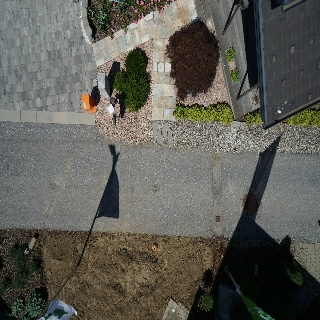

I0812 13:20:25.709748 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.7, score threshold: 0.7
I0812 13:20:28.935345 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09291458129882812


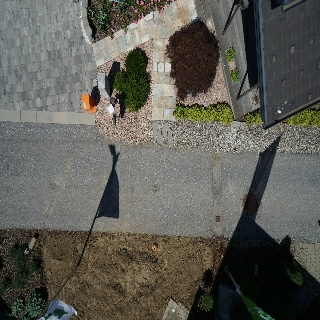

I0812 13:20:28.949349 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.8, score threshold: 0.8
I0812 13:20:32.117759 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09901785850524902


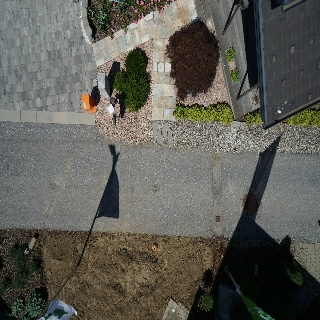

I0812 13:20:32.132812 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.9, score threshold: 0.9
I0812 13:20:35.162165 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09367132186889648


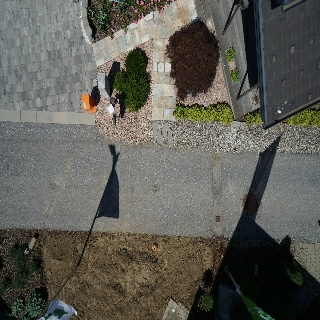

I0812 13:20:35.177532 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.2, score threshold: 0.5
I0812 13:20:38.433540 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10500288009643555


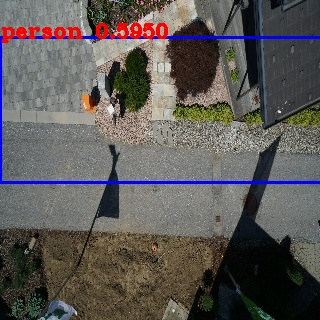

I0812 13:20:38.449883 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.3, score threshold: 0.5
I0812 13:20:41.470622 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.09975528717041016


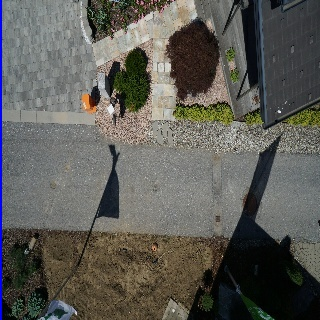

I0812 13:20:41.492758 139745662187392 <ipython-input-35-deaee2ef2b2b>:4] # iou threshold: 0.4, score threshold: 0.5
I0812 13:20:44.715873 139745662187392 <ipython-input-29-eefec7be898a>:33] time: 0.10419869422912598


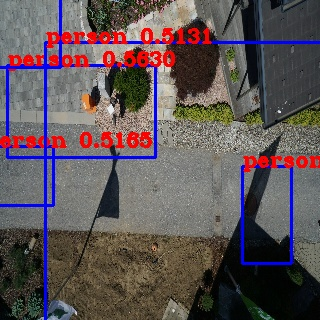

In [35]:
tests=[[0.2,0.2],[0.3,0.3],[0.4,0.4],[0.5,0.5],[0.6,0.6],[0.7,0.7],[0.8,0.8],[0.9,0.9],[0.2,0.5],[0.3,0.5],[0.4,0.5]]
for i in range(len(tests)):
  hyperparameter(tests[i][0],tests[i][1])
  logging.info('# iou threshold: {}, score threshold: {}'.format(tests[i][0], tests[i][1]))
  load()
